# Fig 4 - stochasticity

Want `n_k = 400, n_its=1000`

Use `cluster/f4_fung_stoch.submit`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

from math import floor

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
from plotly import colors

sns.set_theme(style="ticks")

from colour import Color
import itertools

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from math import exp, log, log10

from polymodel.config import Config

from polymodel.consts import (
    DEFAULT_I0, 
    DEFAULT_BETA,
    MUTATION_PROP,
    FUNG_MUTATION_SCALE,
    HOST_MUTATION_SCALE,
    DEFAULT_P,
    TRAIN_TEST_SPLIT_PROPORTION
)

from plots.fns import (
    dist_means_as_df,
    get_arrow_annotation,
    get_text_annotation,
    standard_layout,
    traces_with_uncertainty,
    traces_with_uncertainty_bands, 
    hex_to_rgb
)

In [3]:
COLZ = sns.color_palette('muted').as_hex()

In [4]:
ds_d02 = pd.read_csv('../data/05_outputs/fig4/fig4_ds_d02.csv').filter(regex='^((?!year.).)*$').filter(like='y').set_index('year')
ds_d12 = pd.read_csv('../data/05_outputs/fig4/fig4_ds_d12.csv').filter(regex='^((?!year.).)*$').filter(like='y').set_index('year')
ds_d32 = pd.read_csv('../data/05_outputs/fig4/fig4_ds_d32.csv').filter(regex='^((?!year.).)*$').filter(like='y').set_index('year')

y_d02 = pd.read_csv('../data/05_outputs/fig4/fig4_y_d02.csv').filter(regex='^((?!year.).)*$').filter(like='y').set_index('year')
y_d12 = pd.read_csv('../data/05_outputs/fig4/fig4_y_d12.csv').filter(regex='^((?!year.).)*$').filter(like='y').set_index('year')
y_d32 = pd.read_csv('../data/05_outputs/fig4/fig4_y_d32.csv').filter(regex='^((?!year.).)*$').filter(like='y').set_index('year')

fd_diff02 = pd.read_csv('../data/05_outputs/fig4/fig4_fd_diff02.csv').filter(regex='^((?!year.).)*$').filter(like='y').set_index('year')
fd_diff12 = pd.read_csv('../data/05_outputs/fig4/fig4_fd_diff12.csv').filter(regex='^((?!year.).)*$').filter(like='y').set_index('year')
fd_diff32 = pd.read_csv('../data/05_outputs/fig4/fig4_fd_diff32.csv').filter(regex='^((?!year.).)*$').filter(like='y').set_index('year')

In [29]:
def compare_with_stoch(
    ds_d02,
    ds_d12,
    ds_d32,
    
    y_d02,
    y_d12,
    y_d32,
    
    fd_diff02,
    fd_diff12,
    fd_diff32,
):
    
    fig = make_subplots(
        rows=3,
        cols=3,
        shared_xaxes=True,
        horizontal_spacing=0.12,
    )
    
    col1 = 'rgba(0,255,0,1)'
    col2 = 'rgba(50,50,50,1)'
    col3 = 'rgba(255,0,0,1)'
    
    
    # bds = [5, 95]
    BDS = [5, 25, 75, 95]
    
    
    # ROW 1
    
    trcs_dsd02 = traces_with_uncertainty_bands(ds_d02, bds=BDS, color=col1, showlegend=False)
    trcs_dsd12 = traces_with_uncertainty_bands(ds_d12, bds=BDS, color=col1, showlegend=False)
    trcs_dsd32 = traces_with_uncertainty_bands(ds_d32, bds=BDS, color=col1, showlegend=False)
    
    fig.add_traces(trcs_dsd02, rows=1, cols=1)
    fig.add_traces(trcs_dsd12, rows=1, cols=2)
    fig.add_traces(trcs_dsd32, rows=1, cols=3)
    
    cross_12 = 6 + 0.255 / (0.255 + 0.284)
    cross_32 = 4 + 0.0331 / (0.0331 + 0.302)
    
    scatter12 = go.Scatter(
        x=[cross_12],
        y=[0],
        marker=dict(color='rgb(0,0,0)', size=8),
        showlegend=False,
        mode='markers'
    )
    
    scatter32 = go.Scatter(
        x=[cross_32],
        y=[0],
        marker=dict(color='rgb(0,0,0)', size=8),
        showlegend=False,
        mode='markers'
    )
    
    fig.add_traces([scatter12], rows=1, cols=2)
    fig.add_traces([scatter32], rows=1, cols=3)    
    
    # ROW 2
    
    trcs_yd02 = traces_with_uncertainty_bands(y_d02, bds=BDS, color=col1, showlegend=False)
    trcs_yd12 = traces_with_uncertainty_bands(y_d12, bds=BDS, color=col1, showlegend=False)
    trcs_yd32 = traces_with_uncertainty_bands(y_d32, bds=BDS, color=col1, showlegend=False)
    
    fig.add_traces(trcs_yd02, rows=2, cols=1)
    fig.add_traces(trcs_yd12, rows=2, cols=2)
    fig.add_traces(trcs_yd32, rows=2, cols=3)
    
    scatter12b = go.Scatter(
        x=[cross_12],
        y=[0],
        marker=dict(color='rgb(0,0,0)', size=8),
        showlegend=False,
        mode='markers'
    )
    
    scatter32b = go.Scatter(
        x=[cross_32],
        y=[0],
        marker=dict(color='rgb(0,0,0)', size=8),
        showlegend=False,
        mode='markers'
    )
    
    fig.add_traces([scatter12b], rows=2, cols=2)
    fig.add_traces([scatter32b], rows=2, cols=3)
    
    
    
    # ROW 3
    
    fd_diff02 = (
        fd_diff02
        .reset_index()
        .assign(year = lambda df: df.year-1)
        .set_index('year')
    )
    
    fd_diff12 = (
        fd_diff12
        .reset_index()
        .assign(year = lambda df: df.year-1)
        .set_index('year')
    )
    
    fd_diff32 = (
        fd_diff32
        .reset_index()
        .assign(year = lambda df: df.year-1)
        .set_index('year')
    )
    
    trcd02 = traces_with_uncertainty_bands(
        fd_diff02, 
        bds=BDS,
        color=col1,
        name='',
        showlegend=False,
    )
    
    trcd12 = traces_with_uncertainty_bands(
        fd_diff12, 
        bds=BDS,
        color=col1,
        name='',
        showlegend=False,
    )
    
    trcd32 = traces_with_uncertainty_bands(
        fd_diff32, 
        bds=BDS,
        color=col1,
        name='',
        showlegend=False,
    )
    
    fig.add_traces(trcd02, rows=3, cols=1)
    fig.add_traces(trcd12, rows=3, cols=2)
    fig.add_traces(trcd32, rows=3, cols=3)
    
    # ANNOTATIONS
    
    x1 = 0.6
    x2 = 0.7
    x3 = 0.8
    x4 = 0.9
    x5 = 1
    
    yt=1.17
    yb=1.13
    
    eps = 0.018
    
    row1 = 1.06
    row2 = 0.69
    row3 = 0.32
    
    col1 = -0.02
    col2 = 0.35
    col3 = 0.73
    
    annotz = [
        get_text_annotation(0.146, 1.055, 'Difference:<br>2 vs 0 sprays', xanchor='center', yanchor='middle'),
        get_text_annotation(0.510, 1.055, 'Difference:<br>2 vs 1 spray', xanchor='center', yanchor='middle'),
        get_text_annotation(0.896, 1.055, 'Difference:<br>2 vs 3 sprays', xanchor='center', yanchor='middle'),
        
        get_text_annotation(x1, yb-eps, '5', xanchor='center', yanchor='middle', size=14),
        get_text_annotation(x2, yb-eps, '25', xanchor='center', yanchor='middle', size=14),
        get_text_annotation(x3, yb-eps, '50', xanchor='center', yanchor='middle', size=14),
        get_text_annotation(x4, yb-eps, '75', xanchor='center', yanchor='middle', size=14),
        get_text_annotation(x5, yb-eps, '95', xanchor='center', yanchor='middle', size=14),
        
        get_text_annotation(col1, row1, 'A', size=20),
        get_text_annotation(col2, row1, 'D', size=20),
        get_text_annotation(col3, row1, 'G', size=20),
        get_text_annotation(col1, row2, 'B', size=20),
        get_text_annotation(col2, row2, 'E', size=20),
        get_text_annotation(col3, row2, 'H', size=20),
        get_text_annotation(col1, row3, 'C', size=20),
        get_text_annotation(col2, row3, 'F', size=20),
        get_text_annotation(col3, row3, 'I', size=20),
        
    ]
    
    # LAYOUT
    
    fig.update_layout(standard_layout(True, height=750))
    fig.update_layout(font=dict(size=14))
    fig.update_layout(annotations=annotz)
    
    
    
    fig.update_layout(
        shapes=[
            dict(type="rect", xref="paper", yref="paper",
                 x0=x1,
                 x1=x2,
                 y0=yt,
                 y1=yb,
                 line_width=1,
                 line_color="rgb(0,255,0)",
                 fillcolor="rgb(0,255,0)",
                 opacity=0.1,
            ),
            dict(type="rect", xref="paper", yref="paper",
                 x0=x2,
                 x1=x3,
                 y0=yt,
                 y1=yb,
                 line_width=1,
                 line_color="rgb(0,255,0)",
                 fillcolor="rgb(0,255,0)",
                 opacity=0.2,
            ),
            dict(type="line", xref="paper", yref="paper",
                 x0=x3,
                 x1=x3,
                 y0=yt,
                 y1=yb,
                 line_width=2.5,
                 line_color="rgb(0,255,0)",
                 opacity=1,
            ),
            dict(type="rect", xref="paper", yref="paper",
                 x0=x3,
                 x1=x4,
                 y0=yt,
                 y1=yb,
                 line_width=1,
                 line_color="rgb(0,255,0)",
                 fillcolor="rgb(0,255,0)",
                 opacity=0.2,
            ),
            dict(type="rect", xref="paper", yref="paper",
                 x0=x4,
                 x1=x5,
                 y0=yt,
                 y1=yb,
                 line_width=1,
                 line_color="rgb(0,255,0)",
                 fillcolor="rgb(0,255,0)",
                 opacity=0.1,
            ),
            
            dict(type="line", xref="paper", yref="paper",
                 x0=x1,
                 x1=x1,
                 y0=yb,
                 y1=yb-0.25*eps,
                 line_width=1.5,
                 line_color="rgb(110,110,110)",
                 opacity=1,
            ),
            
            dict(type="line", xref="paper", yref="paper",
                 x0=x2,
                 x1=x2,
                 y0=yb,
                 y1=yb-0.25*eps,
                 line_width=1.5,
                 line_color="rgb(110,110,110)",
                 opacity=1,
            ),
            
            dict(type="line", xref="paper", yref="paper",
                 x0=x3,
                 x1=x3,
                 y0=yb,
                 y1=yb-0.25*eps,
                 line_width=1.5,
                 line_color="rgb(110,110,110)",
                 opacity=1,
            ),
            
            dict(type="line", xref="paper", yref="paper",
                 x0=x4,
                 x1=x4,
                 y0=yb,
                 y1=yb-0.25*eps,
                 line_width=1.5,
                 line_color="rgb(110,110,110)",
                 opacity=1,
            ),
            
            dict(type="line", xref="paper", yref="paper",
                 x0=x5,
                 x1=x5,
                 y0=yb,
                 y1=yb-0.25*eps,
                 line_width=1.5,
                 line_color="rgb(110,110,110)",
                 opacity=1,
            ),
    ])
    
    range_ = [-0.5, 15.5]
    
    fig.update_xaxes(title='Time (years)', row=3, col=1, range=range_)
    fig.update_xaxes(title='Time (years)', row=3, col=2, range=range_)
    fig.update_xaxes(title='Time (years)', row=3, col=3, range=range_)
    
    fig.update_yaxes(title='Severity increase (%)', row=1, col=1)
    fig.update_yaxes(title='Yield increase (tons/ha)', row=2, col=1)
    fig.update_yaxes(title='Trait mean increase', row=3, col=1)
    
    return fig

## FIG

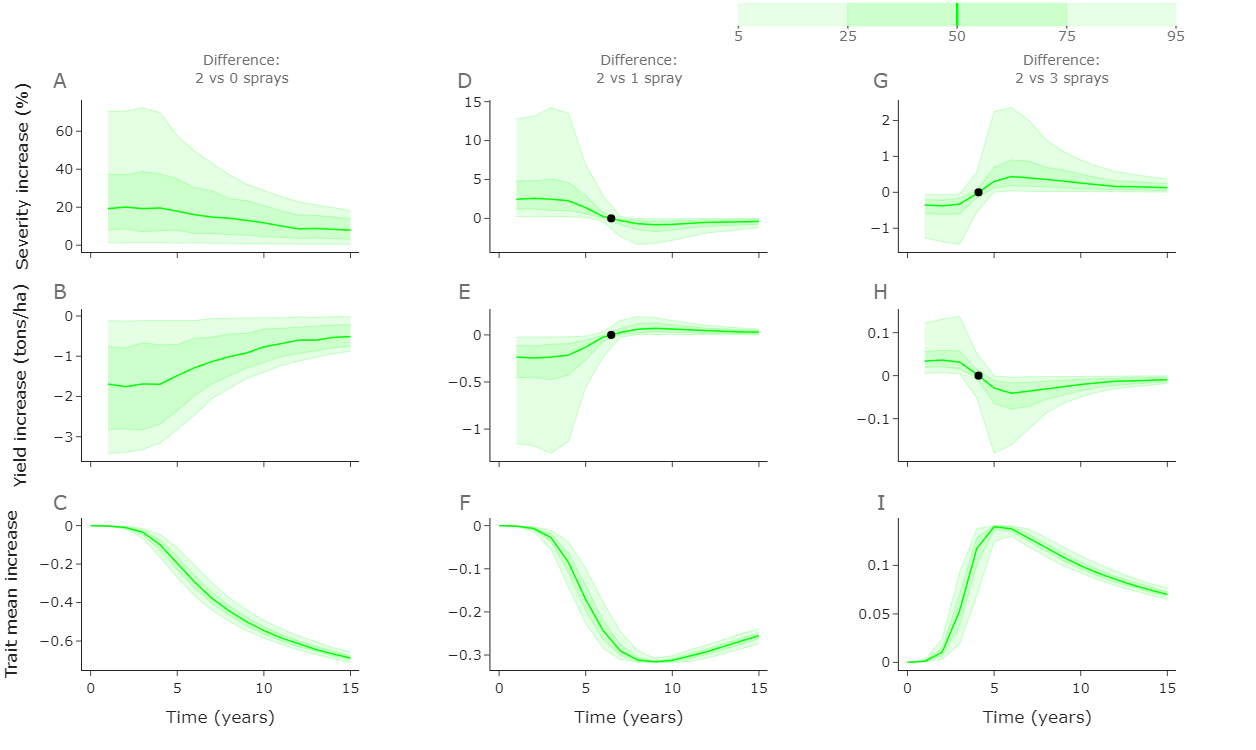

In [30]:
f = compare_with_stoch(
    ds_d02,
    ds_d12,
    ds_d32,
    
    y_d02,
    y_d12,
    y_d32,
    
    fd_diff02,
    fd_diff12,
    fd_diff32,
)

f.show()

In [31]:
f.write_image('../figures/paper_figs/fig4.png', scale=4)